In [ ]:
#Conda 환경 설정
!conda create -n convert
!conda activate convert
!conda install jupyter notebook
!python3 -m ipykernel install --user --name convert --display-name "convert"

In [ ]:
#update
!sudo apt update --yes
!sudo apt upgrade --yes
!sudo apt autoremove --yes

In [ ]:
#lib 설치
!conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch
!conda install -c conda-forge onnx

In [ ]:
%cd /home/ai/Desktop/work/ai_boostcamp/final/pth_convert

Pytorch를 ONNX로 변환

In [8]:
import torch
import onnx
#https://github.com/pytorch/vision/blob/main/torchvision/models/segmentation/deeplabv3.py

#용범님이 upload한 deeplayv3.py 파일이 ipynb 실행 폴더에 위치
from models.deeplabv3 import deeplabv3_mobilenet_v3

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch_model = deeplabv3_mobilenet_v3(
    pretrained=False,
    pretrained_backbone=False,
    aux_loss=False,
    small=False,
    grid_mode=True,
).to(device)
#용범님이 upload한 model_weights.pth 파일이 ipynb 실행 폴더에 위치
model_path = 'model_weights_grid.211217.pth'
torch_model.load_state_dict(torch.load(model_path))
torch_model.eval()

batch_size = 1
#[batch_size, channels, height, width]
x = torch.randn(batch_size, 3, 240, 320).to(device)

# 모델 변환
torch.onnx.export(torch_model,               # 실행될 모델
                  x,                         # 모델 입력값 (튜플 또는 여러 입력값들도 가능)
                  "onnx.onnx",   # 모델 저장 경로 (파일 또는 파일과 유사한 객체 모두 가능)
                  #export_params=True,        # 모델 파일 안에 학습된 모델 가중치를 저장할지의 여부 default True
                  #opset_version=12,          # 모델을 변환할 때 사용할 ONNX 버전
                  #do_constant_folding=False,  # 최적하시 상수폴딩을 사용할지의 여부 Default False
                  verbose = True,
                  input_names = ['actual_input_1'],   # 모델의 입력값을 가리키는 이름
                  output_names = ['output1'] # 모델의 출력값을 가리키는 이름
                  )
onnx_model = onnx.load("onnx.onnx")
onnx.checker.check_model(onnx_model)
onnx.helper.printable_graph(onnx_model.graph)

/opt/conda/envs/opt-py39/lib/python3.9/site-packages/torch/onnx/symbolic_helper.py:381: UserWarning: You are trying to export the model with onnx:Upsample for ONNX opset version 9. This operator might cause results to not match the expected results by PyTorch.
ONNX's Upsample/Resize operator did not match Pytorch's Interpolation until opset 11. Attributes to determine how to transform the input were added in onnx:Resize in opset 11 to support Pytorch's behavior (like coordinate_transformation_mode and nearest_mode).
We recommend using opset 11 and above for models using this operator.
  warnings.warn("You are trying to export the model with " + onnx_op + " for ONNX opset version "


graph(%actual_input_1 : Float(1, 3, 240, 320, strides=[230400, 76800, 320, 1], requires_grad=0, device=cuda:0),
      %backbone.4.block.2.fc1.weight : Float(24, 72, 1, 1, strides=[72, 1, 1, 1], requires_grad=1, device=cuda:0),
      %backbone.4.block.2.fc1.bias : Float(24, strides=[1], requires_grad=1, device=cuda:0),
      %backbone.4.block.2.fc2.weight : Float(72, 24, 1, 1, strides=[24, 1, 1, 1], requires_grad=1, device=cuda:0),
      %backbone.4.block.2.fc2.bias : Float(72, strides=[1], requires_grad=1, device=cuda:0),
      %backbone.5.block.2.fc1.weight : Float(32, 120, 1, 1, strides=[120, 1, 1, 1], requires_grad=1, device=cuda:0),
      %backbone.5.block.2.fc1.bias : Float(32, strides=[1], requires_grad=1, device=cuda:0),
      %backbone.5.block.2.fc2.weight : Float(120, 32, 1, 1, strides=[32, 1, 1, 1], requires_grad=1, device=cuda:0),
      %backbone.5.block.2.fc2.bias : Float(120, strides=[1], requires_grad=1, device=cuda:0),
      %backbone.6.block.2.fc1.weight : Float(32, 120

"graph torch-jit-export (\n  %actual_input_1[FLOAT, 1x3x240x320]\n) initializers (\n  %backbone.4.block.2.fc1.weight[FLOAT, 24x72x1x1]\n  %backbone.4.block.2.fc1.bias[FLOAT, 24]\n  %backbone.4.block.2.fc2.weight[FLOAT, 72x24x1x1]\n  %backbone.4.block.2.fc2.bias[FLOAT, 72]\n  %backbone.5.block.2.fc1.weight[FLOAT, 32x120x1x1]\n  %backbone.5.block.2.fc1.bias[FLOAT, 32]\n  %backbone.5.block.2.fc2.weight[FLOAT, 120x32x1x1]\n  %backbone.5.block.2.fc2.bias[FLOAT, 120]\n  %backbone.6.block.2.fc1.weight[FLOAT, 32x120x1x1]\n  %backbone.6.block.2.fc1.bias[FLOAT, 32]\n  %backbone.6.block.2.fc2.weight[FLOAT, 120x32x1x1]\n  %backbone.6.block.2.fc2.bias[FLOAT, 120]\n  %backbone.11.block.2.fc1.weight[FLOAT, 120x480x1x1]\n  %backbone.11.block.2.fc1.bias[FLOAT, 120]\n  %backbone.11.block.2.fc2.weight[FLOAT, 480x120x1x1]\n  %backbone.11.block.2.fc2.bias[FLOAT, 480]\n  %backbone.12.block.2.fc1.weight[FLOAT, 168x672x1x1]\n  %backbone.12.block.2.fc1.bias[FLOAT, 168]\n  %backbone.12.block.2.fc2.weight[FLOAT,

ONNX를 TensorFlow로 변환

In [ ]:
!pip install onnx_tf
!sudo apt update --yes
!sudo apt install python3-dev python3-pip python3-venv --yes
!pip install --upgrade tensorflow

In [9]:
from onnx_tf.backend import prepare
import onnx

TF_PATH = "./pb.pb" # where the representation of tensorflow model will be stored
ONNX_PATH = "./onnx.onnx" # path to my existing ONNX model
onnx_model = onnx.load(ONNX_PATH)  # load onnx model

# prepare function converts an ONNX model to an internel representation
# of the computational graph called TensorflowRep and returns
# the converted representation.
tf_rep = prepare(onnx_model)  # creating TensorflowRep object

# export_graph function obtains the graph proto corresponding to the ONNX
# model associated with the backend representation and serializes
# to a protobuf file.
tf_rep.export_graph(TF_PATH)

INFO:tensorflow:Assets written to: ./pb.pb/assets


INFO:tensorflow:Assets written to: ./pb.pb/assets


TensorFlow를 TensorFlow Lite로 변환

In [10]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("./pb.pb") # path to the SavedModel directory

#optimization
#https://github.com/sithu31296/PyTorch-ONNX-TFLite
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.target_spec.supported_ops = [
#     tf.lite.OpsSet.TFLITE_BUILTINS,  # enable TFLite ops
#     tf.lite.OpsSet.SELECT_TF_OPS  # enable TF ops
# ]
tflite_model = converter.convert()

# Save the model.
with open('tflite.tflite', 'wb') as f:
  f.write(tflite_model)

2021-12-18 00:57:20.194921: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2021-12-18 00:57:20.194985: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2021-12-18 00:57:20.194994: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:372] Ignored change_concat_input_ranges.
2021-12-18 00:57:20.195344: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: ./pb.pb
2021-12-18 00:57:20.225654: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2021-12-18 00:57:20.225716: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: ./pb.pb
2021-12-18 00:57:20.269390: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-12-18 00:57:20.452391: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: ./pb.pb
2021-12-18 00:57:20.664845: I

Estimated count of arithmetic ops: 5.781 G  ops, equivalently 2.891 G  MACs


torch.Size([1, 3, 240, 320])


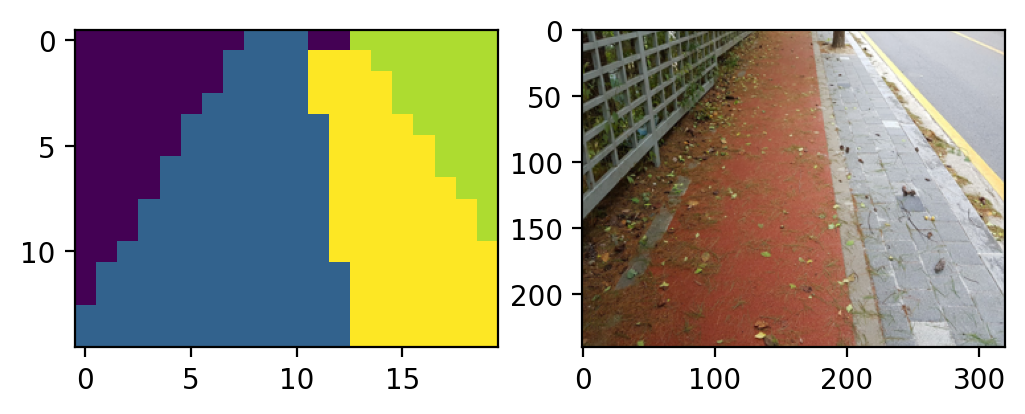

In [11]:
import numpy as np
import tensorflow as tf
from PIL import Image 
import torchvision.transforms as transforms

filename = './test_images/MP_SEL_SUR_000002.jpg'
img = Image.open(filename)
img = img.resize((320, 240))
to_tesnsor = transforms.ToTensor()
input_data = to_tesnsor(img)
input_data = input_data.unsqueeze(0)
print(input_data.size())
to_pil = transforms.ToPILImage()
img = to_pil(input_data.squeeze())
img.save('./resize.jpg')

#transfom compose 방법
# input_image = Image.open(filename)
# input_image = input_image.convert("RGB")
# preprocess = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Resize((480, 640)),
#     #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])
# input_data = preprocess(input_image)
# input_data = input_data.unsqueeze(0) # create a mini-batch as expected by the model
# print(input_data.size())


interpreter = tf.lite.Interpreter(model_path='tflite.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
output_data = output_data.argmax(1)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, dpi=200)
axes[0].imshow(output_data[0])
axes[1].imshow(input_data[0].cpu().numpy().transpose([1, 2, 0]))